## Outlier:
- An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error or data corruption, etc.
- An outlier is an observation that is unlike the other observations.

There are many ways like visualization techniques, mathematical methods and also automatic model-based methods which can be used for identifying outliers in the data.
Some of the outlier detection methods are:

### 1. Using Percentile:

In [68]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
data_path = "data/weight-height.csv"
# Reading csv file
df = pd.read_csv(data_path)

In [70]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [71]:
# Print shape of the DF
df.shape

(10000, 3)

In [72]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [73]:
# # last_column = df.iloc[: , -1:]
# # Syntax to split =: iloc[rows, cols]
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1:]

In [74]:
# We will select a particular column for finding outlier
# Let's consider `Height` column
min_threshold, max_threshold = df.Height.quantile([0.1, 0.99])
min_threshold, max_threshold

(61.41270131336016, 74.7857900583366)

In [75]:
# Sometimes we may not have domain knowledge that what all can be the wrong heights 
# or in case of other datasets like House price dataset we might now know, real price wrt Location or any other parameter
# So here we have to use our intuition
df[df.Height < min_threshold]

,Gender,Height,Weight
426,Male,60.748118,136.167866
551,Male,60.679817,129.301024
936,Male,61.121829,152.791130
1238,Male,60.363312,134.146848
1339,Male,61.310798,150.316449
...,...,...,...
9984,Female,59.047029,111.707369
9988,Female,59.538729,121.244876
9989,Female,60.955084,95.686674
9993,Female,60.030434,97.687432


In [76]:
df[df.Height > max_threshold]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
4565,Male,75.690384,223.587548
4569,Male,77.547186,242.041173
4701,Male,76.732446,241.686601
4721,Male,75.330847,240.440816


In [77]:
# After removing assumed outliers
# Many of them might not be outlier for understanding purpose we can assume they are
df1 = df[(df.Height > min_threshold) & (df.Height < max_threshold)]
df1.shape

(8900, 3)

### 2. Using Standard Deviation:

In [78]:
df = pd.read_csv(data_path)
df.sample(5)

,Gender,Height,Weight
6130,Female,66.072193,142.595275
2288,Male,68.783873,187.635464
1068,Male,66.510043,181.938176
3933,Male,71.781714,196.522152
8580,Female,65.946472,161.686807


In [79]:
# Let's just play on Gender and Height for now
df1 = df[['Gender', 'Height']]
df1.sample(5)

,Gender,Height
9562,Female,62.299474
4513,Male,68.561371
1,Male,68.781904
6176,Female,55.851214
5208,Female,59.028087


Text(0, 0.5, 'Count')

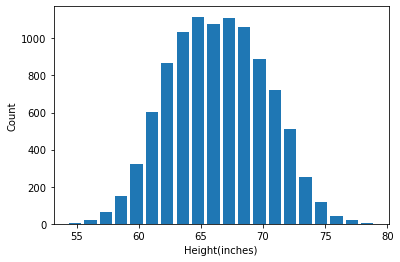

In [80]:
# Histogram for seeing the distribution
plt.hist(df.Height, bins=20, rwidth=0.8)
# First element is array or sequence which we want to plot
# bins: number of bars to in histogram
# rwidth: The relative width of the bars as a fraction of the bin width

plt.xlabel("Height(inches)")
plt.ylabel("Count")

In [81]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Mean: 66.36755975482124 and Std Dev: 3.847528120773229


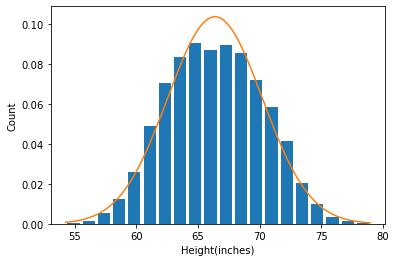

In [82]:
# It is a Normal distribution as we can here plot a bell curve, which means majority of values are near mean
# and if we go away from mean, count are getting decreased
# To know more about Normal Distribution, read: 
# https://www.mathsisfun.com/data/standard-normal-distribution.html

# Now to plot bell curve
from scipy.stats import norm

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height(inches)")
plt.ylabel("Count")

print("Mean: {} and Std Dev: {}".format(df.Height.mean(), df.Height.std()))
# To return evenly spaced values within a given interval
rng = np.arange(df.Height.min(), df.Height.max(), 0.1) # 0.1 is Spacing between values
# print(rng)
# Now to draw bell curve
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))

In [83]:
# Now we will use 3 standard deviation to remove the outliers
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()
upper_limit, lower_limit

(77.91014411714093, 54.82497539250156)

In [84]:
# To get outliers here
df[(df.Height > upper_limit) | (df.Height < lower_limit)]
# They might be also valid heights but for understading purpose we can assume them as outliers for now

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [85]:
df2 = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
df2.shape

(9993, 3)

### 3. Using Z-score:

* Z score is a way to achieve same thing just like standard deviation

* Z score indicates how many standard deviation away a data point is.

* For example in our case mean is 66.37 and standard deviation is 3.84.

* If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

* Z-score = (x-μ)/σ ; x is data point, μ is mean, σ is std dev

In [88]:
# Create a new column z-score
df['zscore'] = (df.Height - df.Height.mean() ) / df.Height.std()
df.sample(10)

,Gender,Height,Weight,zscore
1996,Male,72.610469,216.590561,1.622577
9018,Female,59.978962,114.299371,-1.660442
7354,Female,65.215231,155.611441,-0.299498
5219,Female,66.909452,151.612891,0.140842
4814,Male,67.564457,168.540416,0.311082
2754,Male,68.521250,186.718802,0.559760
8161,Female,61.498639,122.049480,-1.265467
6184,Female,66.204039,153.413709,-0.042500
1824,Male,69.494938,188.419220,0.812828
1727,Male,65.624921,168.035235,-0.193017


In [89]:
# Now we can remove those rows we can rows which have Z-score > 3(std dev> 3)
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [90]:
df[df['zscore']<-3]


,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [94]:
# These are the same outliers which we saw in std dev method
df3 = df[(df.zscore > -3) & (df.zscore < 3)]
df3

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


### 4:  Using IQR (Interquartile Range):

* The IQR describes the middle 50% of values when ordered from lowest to highest. 
* To find the interquartile range (IQR), first find the median (middle value) of the lower and upper half of the data.
* These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.  (IQR = Q3- Q1)

#### Quantile vs Quartile vs Percentile

* Percentiles go from 0 to 100.
* Quartiles go from 1 to 4 (or 0 to 4).
* Quantiles can go from anything to anything.
* Percentiles and quartiles are examples of quantiles.


* 0 quartile = 0 quantile = 0 percentile
* 1 quartile = 0.25 quantile = 25 percentile
* 2 quartile = .5 quantile = 50 percentile (median)
* 3 quartile = .75 quantile = 75 percentile
* 4 quartile = 1 quantile = 100 percentile

In [96]:
# Reading data
df = pd.read_csv(data_path)

In [97]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [98]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)

In [99]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [100]:
# The rule of thumb is that anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [102]:
df[(df.Height<lower_limit) | (df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [104]:
df4 = df[(df.Height>lower_limit) & (df.Height<upper_limit)]
df4

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
